Install Tensor flow

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow_gpu-2.10.1-cp310-cp310-win_amd64.whl (455.9 MB)
     ---------------------------------------- 38.2/38.2 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 3.5 MB/s eta 0:00:00
     -------------------------------------- 266.3/266.3 MB 2.2 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 1.5/1.5 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 14.8/14.8 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 3.5 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     -------------------------------------- 439.2/439.2 KB 3.9 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 KB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 3.5 MB

You should consider upgrading via the 'C:\Users\Owner\PycharmProjects\DeepLearing\deeplearning\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.3.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.2.0
certifi                      2022.12.7
charset-normalizer           2.1.1
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.0.6
cycler                       0.11.0
debugpy                      1.6.4
decorator                    5.1.1
entrypoints                  0.4
executing                    1.2.0
flatbuffers                  23.1.4
fonttools                    4.38.0
gast                         0.4.0
google-auth                  2.15.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.51.1
h5py                         3.7.0
idna                         3.4
ipykernel                    6.19.4
ipython                      8.8.0
jedi    

You should consider upgrading via the 'C:\Users\Owner\PycharmProjects\DeepLearing\deeplearning\Scripts\python.exe -m pip install --upgrade pip' command.


Import Tensor flow

In [2]:
import tensorflow as tf
import os

In [5]:
# Avoid Out Of Memory errors by setting GPU Memory Consumption Growth
#tf.config.list_physical_devices('GPU') ##check if you have a GPu
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Remove Dodgy Images

In [17]:
import cv2
import imghdr
from matplotlib import pyplot as plt 

In [18]:
data_dir = 'data'

In [19]:
image_exts = ['jpeg','jpg','bmp','png']

Looping through each image and removing if the format does not match 

In [20]:
img=cv2.imread(os.path.join(data_dir,'happy','group-of-happy-people-2.jpg'))

In [21]:
img.shape

(1155, 1732, 3)

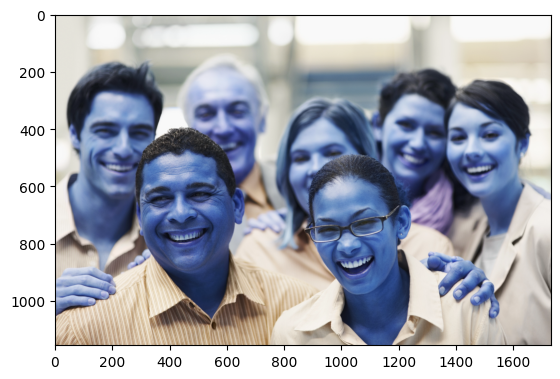

In [23]:
plt.imshow(img)## produces weird color thus execute next

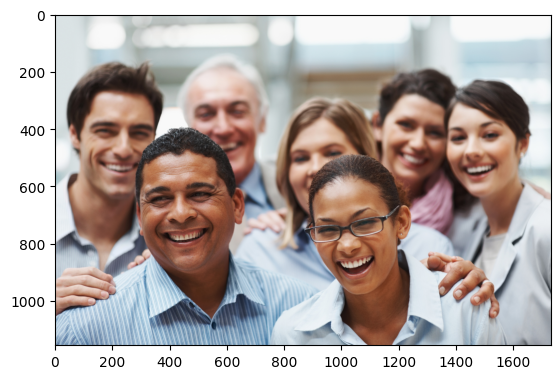

In [31]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
##plt.show()#enable to remove extra information about image

In [32]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)#opens up images 
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print ('Issue with image {}'.format(image_path))
            #os.remove(image path)
        

Load Data

In [36]:
import numpy as np
from matplotlib import pyplot as plt

In [38]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 166 files belonging to 2 classes.


In [39]:
data_iterator = data.as_numpy_iterator()#creating iteration

In [40]:
data_iterator

In [56]:
##Get another batch from the iterator
batch = data_iterator.next()

In [57]:
len(batch)

2

In [58]:
batch[0].shape

(32, 256, 256, 3)

In [59]:
batch[1]

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

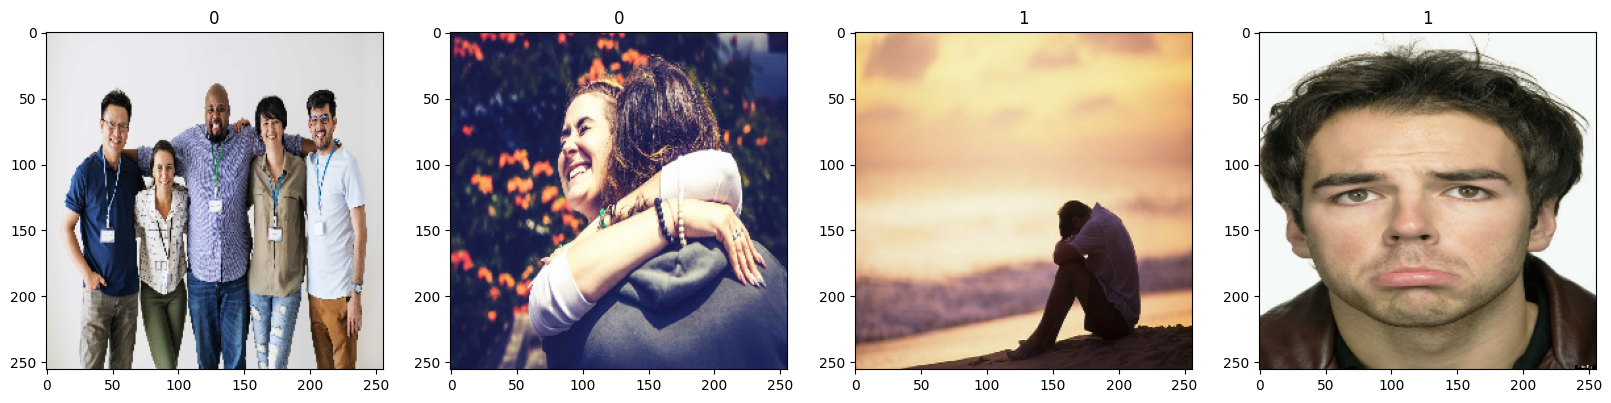

In [75]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [67]:
#scaled=batch[0]/255
#scaled.min()

Preprocess Data

In [76]:
data = data.map(lambda x,y: (x/255, y))#this allows perform the transformation with in the pipeline

In [77]:
data.as_numpy_iterator().next()[0].min()

0.0

In [78]:
scaled_iterator=data.as_numpy_iterator()

In [79]:
batch = scaled_iterator.next()

In [80]:
batch[0].max()

1.0

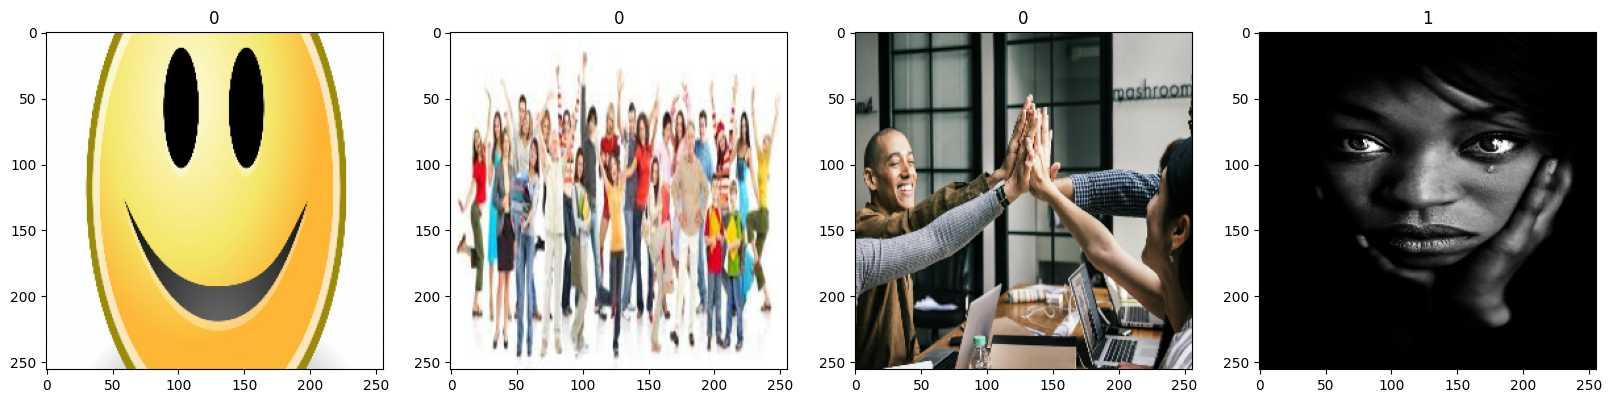

In [82]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Split

In [100]:
len(data)

6

In [143]:
train_size = int(len(data)*0.7) ##training data 
val_size = int(len(data)*0.2)+1   ##validation data
test_size = int(len(data)*0.1)+1   #testing size

In [144]:
train_size+val_size+test_size

7

In [145]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [146]:
len(train)

4

Deep Learning Model

Build Deep Learning Model

In [155]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [156]:
model = Sequential()

In [159]:
#model
model.add(Conv2D(16, (3,3), 1,activation= 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1,activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1,activation= 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))##rectified linear unit 'relu' all non-postive will turn into 0
model.add(Dense(1,activation='sigmoid'))##shaping the values by converting within a range of 0 and 1



In [160]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [161]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

Train

In [162]:
logdir='logs'

In [163]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [164]:
hist = model.fit(train,epochs=20,validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 7s 1s/step - loss: 1.8081 - accuracy: 0.4922 - val_loss: 1.4470 - val_accuracy: 0.3947
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.8992 - accuracy: 0.5078 - val_loss: 0.5810 - val_accuracy: 0.7105
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.6613 - accuracy: 0.6172 - val_loss: 0.5782 - val_accuracy: 0.6842
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.6294 - accuracy: 0.6406 - val_loss: 0.6401 - val_accuracy: 0.7632
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.6084 - accuracy: 0.7656 - val_loss: 0.5185 - val_accuracy: 0.7632
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 0.5566 - accuracy: 0.7500 - val_loss: 0.5077 - val_accuracy: 0.8158
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 0.4754 - accuracy: 0.8047 - val_loss: 0.4216 - val_accuracy: 0.8158
Epoch 8/20
4/4 [=========================

Plot Performance

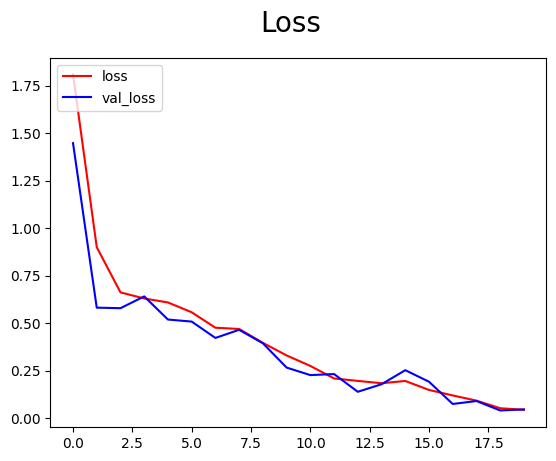

In [166]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

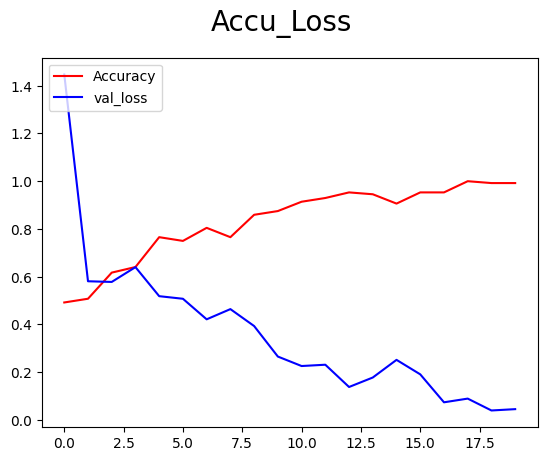

In [168]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='Accuracy')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Accu_Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

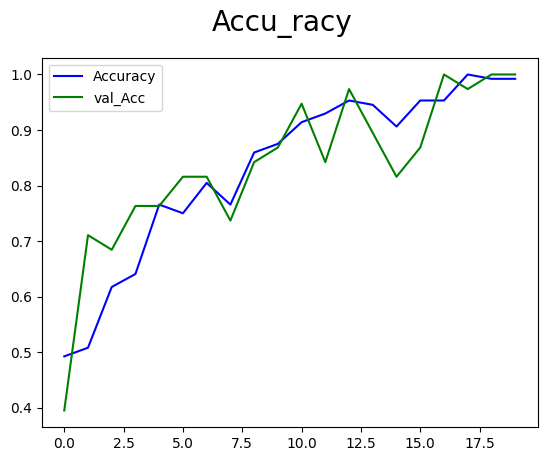

In [169]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='Accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_Acc')
fig.suptitle('Accu_racy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluation of Performance

In [170]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [171]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [175]:
len(train)

4

In [176]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

In [177]:
print(f'Precision: {pre.result().numpy()},Recall: {re.result().numpy()},Accuracy: {acc.result().numpy()}') 

Precision: 0.0,Recall: 0.0,Accuracy: 0.0


Test

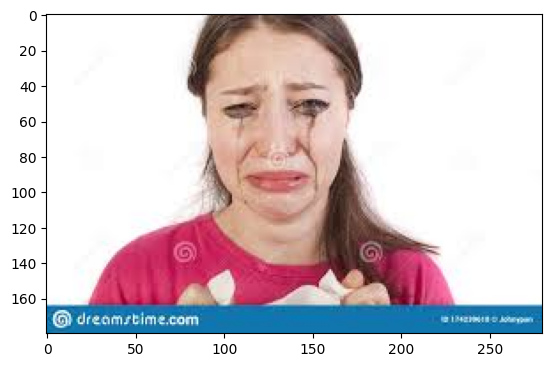

In [188]:
import cv2
img = cv2.imread('sad_test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

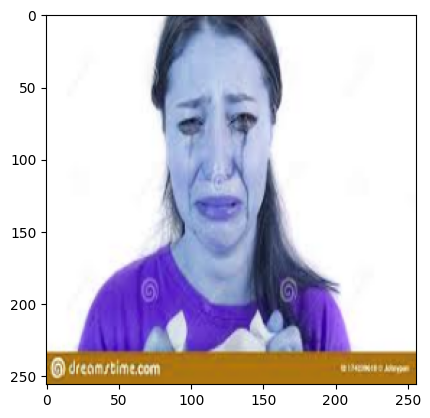

In [189]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [190]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [191]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 33ms/step


In [192]:
 yhat

array([[0.776809]], dtype=float32)

In [193]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


Save Model

In [194]:
from tensorflow.keras.models import load_model

In [195]:
model.save(os.path.join('models','happysadmodel.h5'))

In [196]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [197]:
new_model

In [198]:
NEWHAT = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 86ms/step


In [199]:
if NEWHAT >0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
